In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv(
    "/content/weatherAUS.csv",
    index_col='Date',
    parse_dates=['Date'],)

In [ ]:
df.tail()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [ ]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
Sale = df[df['Location'] == 'Sale']
Sale.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,Sale,10.7,22.1,0.0,10.0,11.5,WSW,76.0,W,WSW,...,46.0,62.0,1001.7,1003.4,4.0,6.0,18.4,16.7,No,No
2009-01-02,Sale,8.0,18.9,0.0,NaN,11.7,W,50.0,W,WSW,...,61.0,36.0,1016.2,1017.3,3.0,6.0,12.5,16.7,No,No
2009-01-03,Sale,4.2,20.0,0.0,4.0,9.1,ESE,33.0,WNW,ESE,...,63.0,43.0,1020.9,1018.0,1.0,6.0,12.9,18.8,No,No
2009-01-04,Sale,6.7,24.3,0.0,5.0,10.5,ESE,33.0,SSW,E,...,70.0,47.0,1017.0,1013.4,3.0,5.0,16.4,23.2,No,No
2009-01-05,Sale,8.9,27.9,0.0,6.8,10.8,ENE,37.0,WNW,SE,...,79.0,52.0,1011.4,1008.9,6.0,1.0,15.9,25.5,No,No


In [ ]:
data = pd.DataFrame(Sale['Temp3pm'])
data.dropna(inplace=True)

In [ ]:
data

,Temp3pm
Date,
2009-01-01,16.7
2009-01-02,16.7
2009-01-03,18.8
2009-01-04,23.2
2009-01-05,25.5
...,...
2017-06-21,12.7
2017-06-22,13.5
2017-06-23,15.4


# Time step feature

In [ ]:
data['Time'] = np.arange(len(data.index))

data.tail()

,Temp3pm,Time
Date,,
2017-06-21,12.7,3003
2017-06-22,13.5,3004
2017-06-23,15.4,3005
2017-06-24,11.5,3006
2017-06-25,14.0,3007


### Linear regression with the time dummy produces the model:

$$target = weight * time + bias$$




<ipython-input-53-3bac1d17c541>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


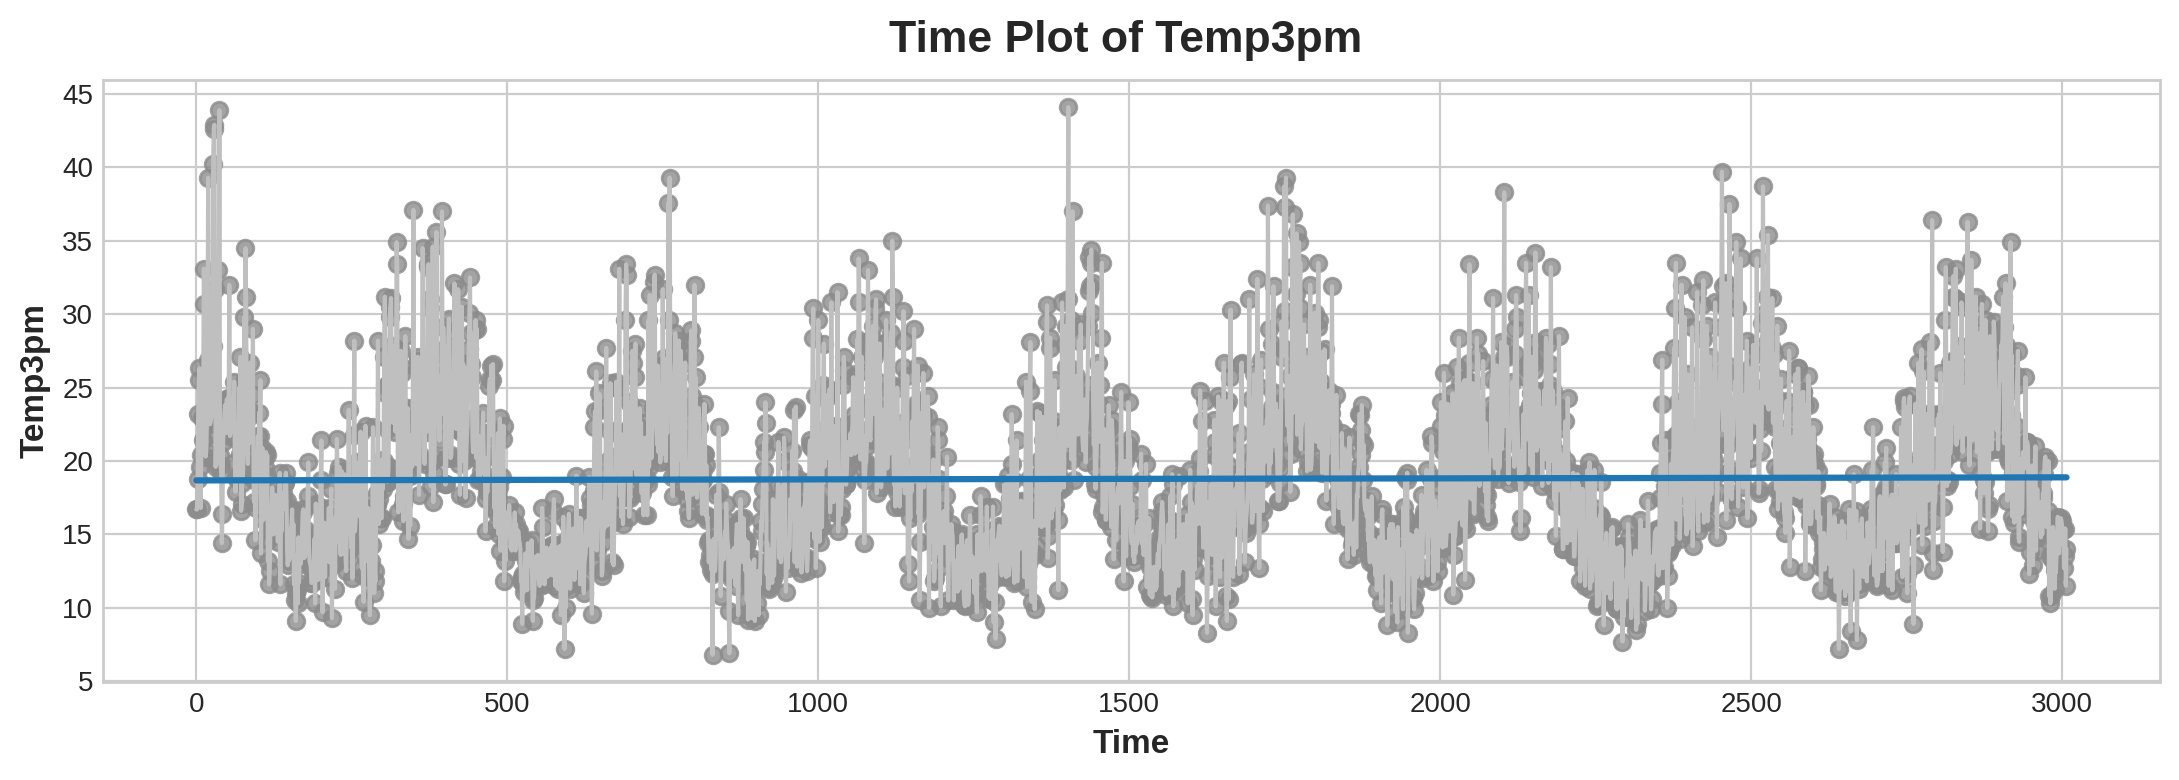

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Temp3pm', data=data, color='0.75')
ax = sns.regplot(x='Time', y='Temp3pm', data=data, ci=None, scatter_kws=dict(color='0.55'))
ax.set_title('Time Plot of Temp3pm ');

In [ ]:
# Training data
X = data.loc[:, ['Time']]  # features
y = data.loc[:, 'Temp3pm']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

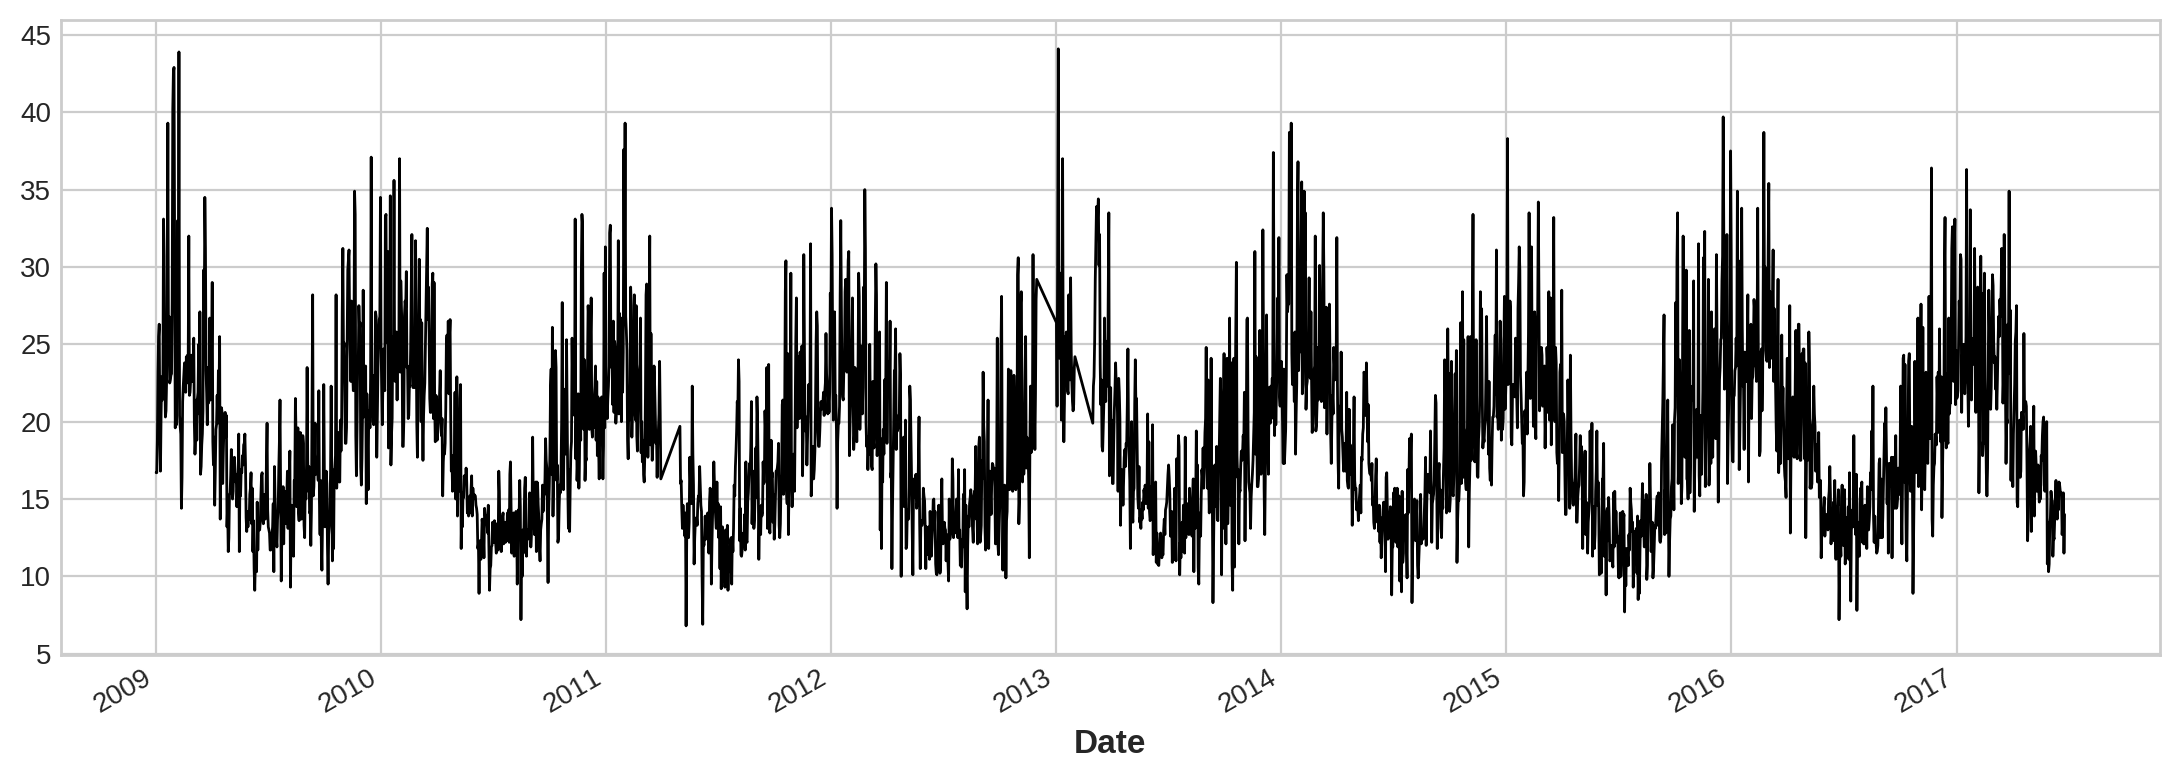

In [ ]:
x = y.plot(kind='line', color='k', linewidth=1)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Temp3pm');

In [ ]:
y_pred

Date
2009-01-01    18.678643
2009-01-02    18.678712
2009-01-03    18.678781
2009-01-04    18.678850
2009-01-05    18.678919
                ...    
2017-06-21    18.886373
2017-06-22    18.886442
2017-06-23    18.886511
2017-06-24    18.886581
2017-06-25    18.886650
Length: 3008, dtype: float64

## Linear regression with a lag feature produces the model:

$$target = weight * lag + bias$$

In [ ]:
data['Lag_1'] = data['Temp3pm'].shift(1)
data = data.reindex(columns=['Temp3pm', 'Lag_1'])

data.head()

,Temp3pm,Lag_1
Date,,
2009-01-01,16.7,NaN
2009-01-02,16.7,16.7
2009-01-03,18.8,16.7
2009-01-04,23.2,18.8
2009-01-05,25.5,23.2


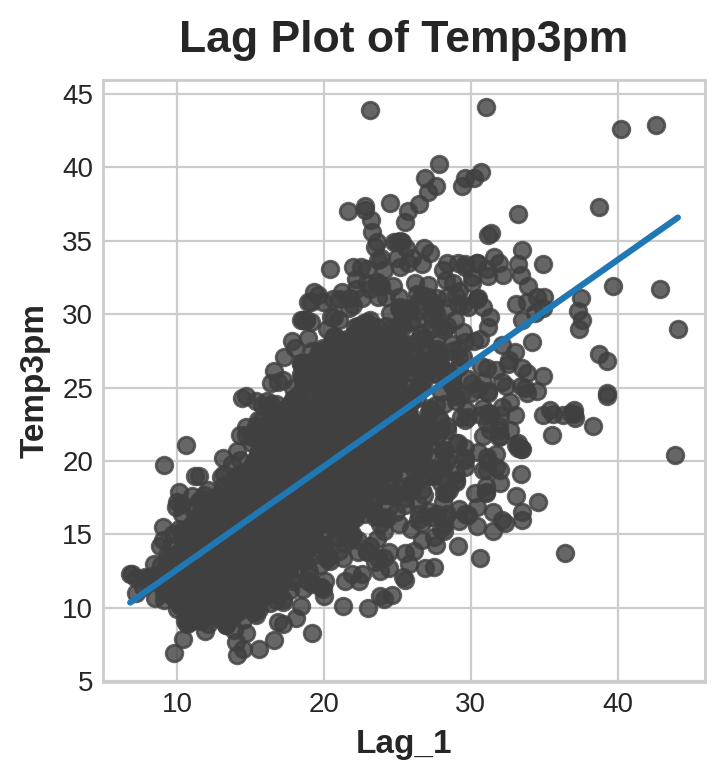

In [ ]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Temp3pm', data=data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Temp3pm');

In [ ]:
from sklearn.linear_model import LinearRegression

X = data.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = data.loc[:, 'Temp3pm']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

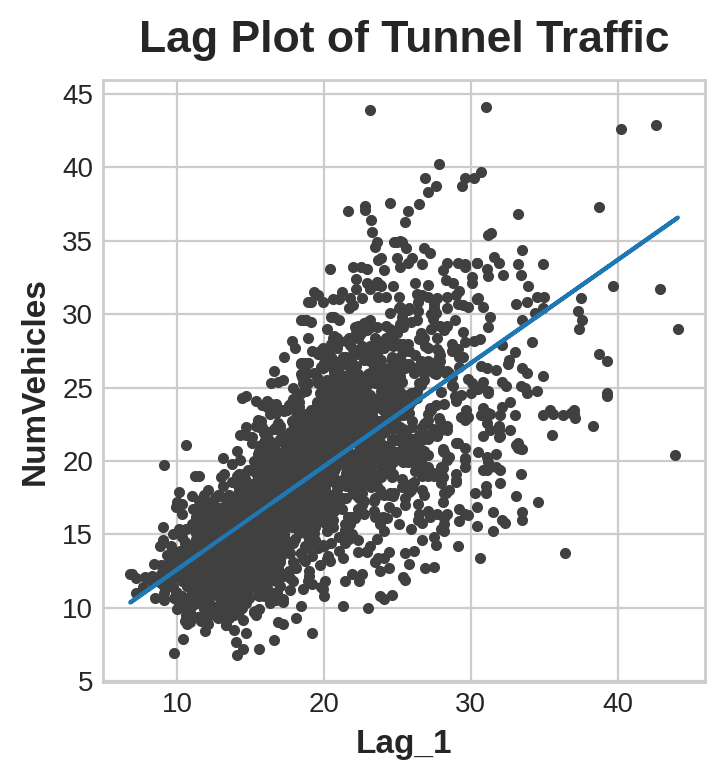

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

In [ ]:
y_pred

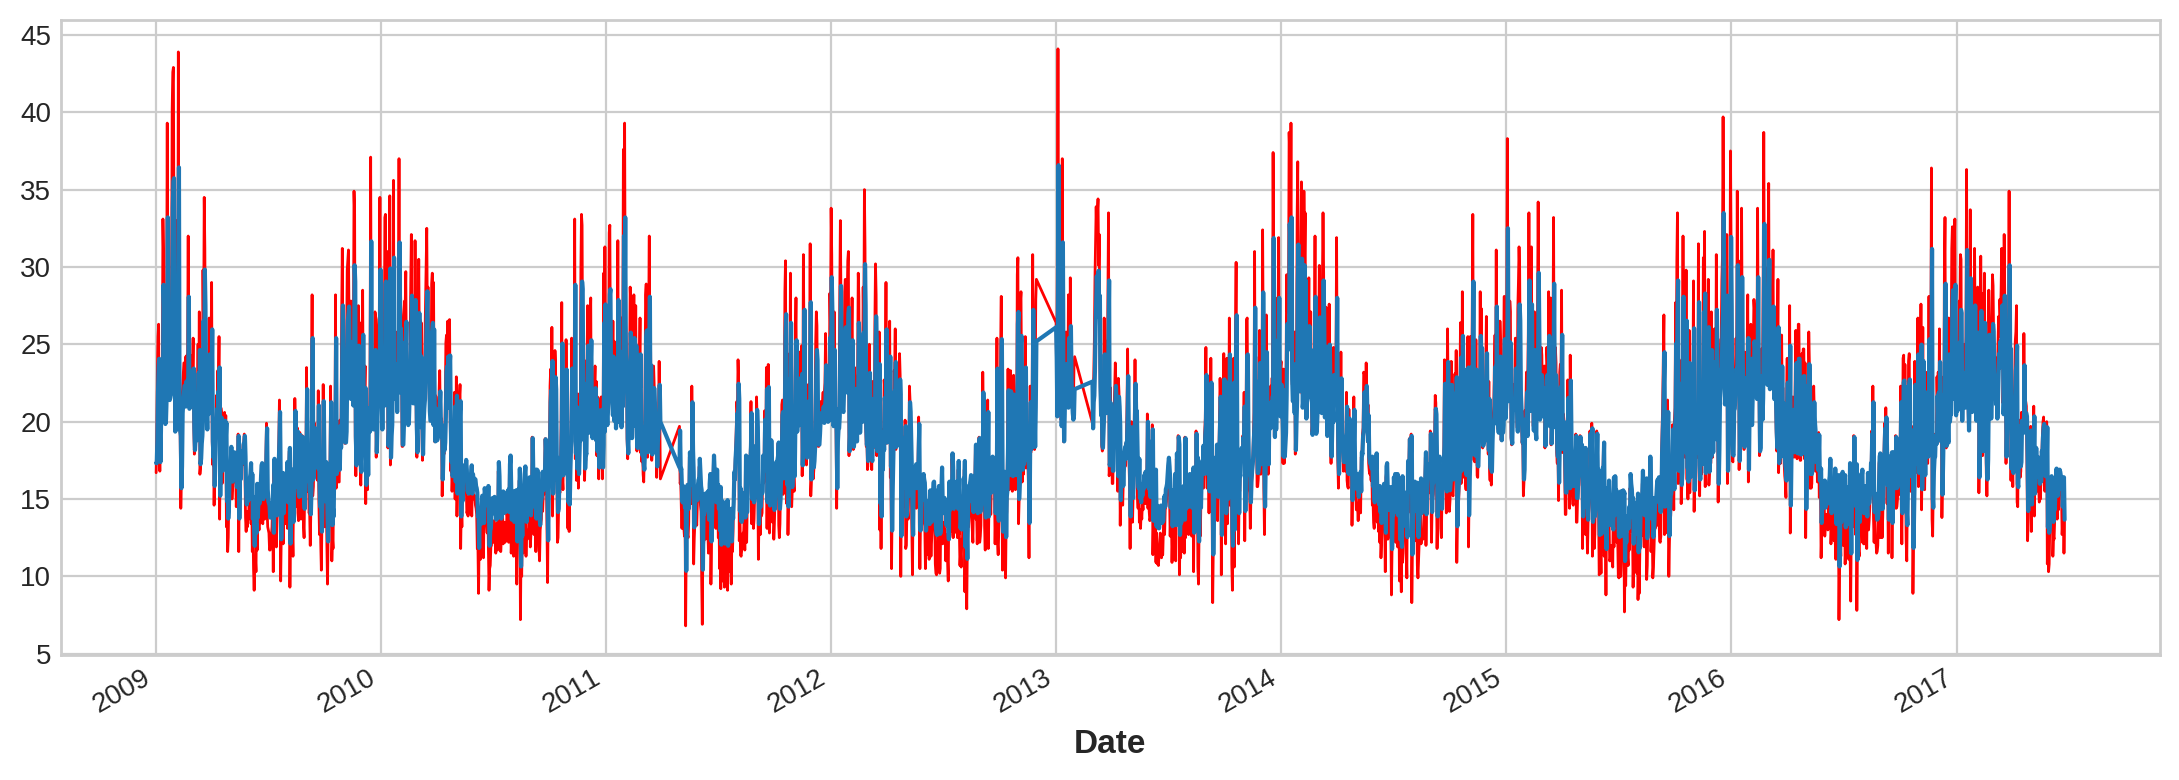

In [ ]:
ax = y.plot(kind='line', color='red', linewidth=1)
ax = y_pred.plot()

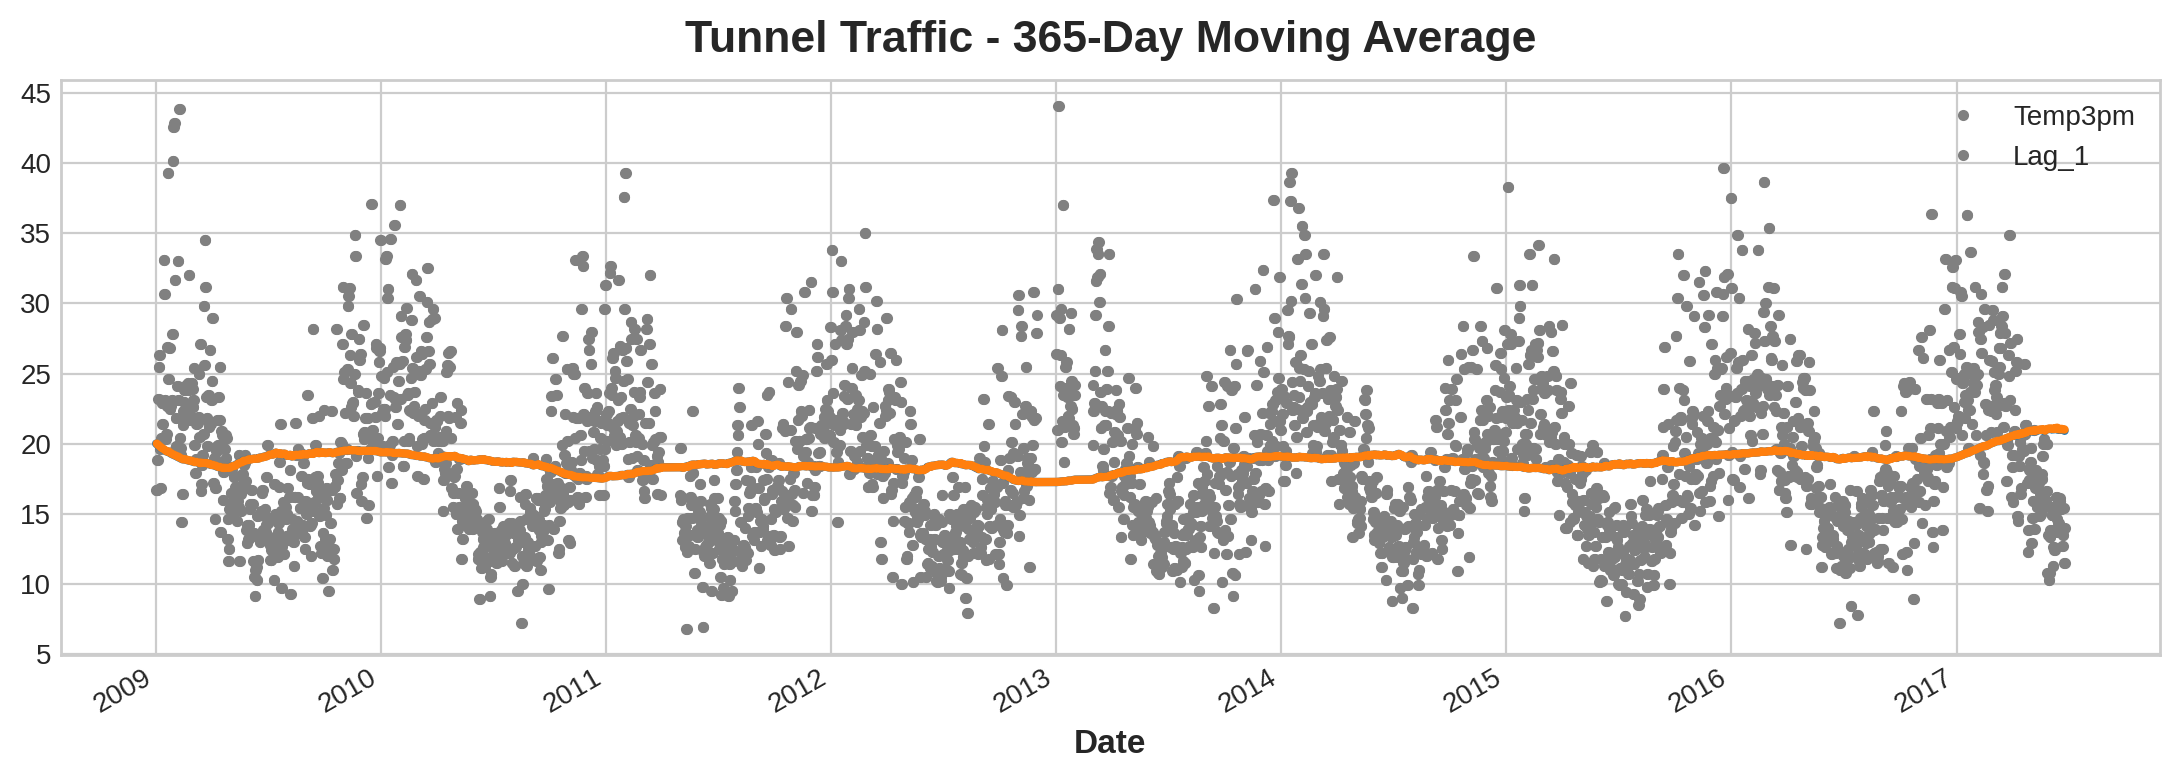

In [ ]:
moving_average = data.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = data.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
);

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=data.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head()

,const,trend
Date,,
2009-01-01,1.0,1.0
2009-01-02,1.0,2.0
2009-01-03,1.0,3.0
2009-01-04,1.0,4.0
2009-01-05,1.0,5.0


In [ ]:
from sklearn.linear_model import LinearRegression

y = data["Temp3pm"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

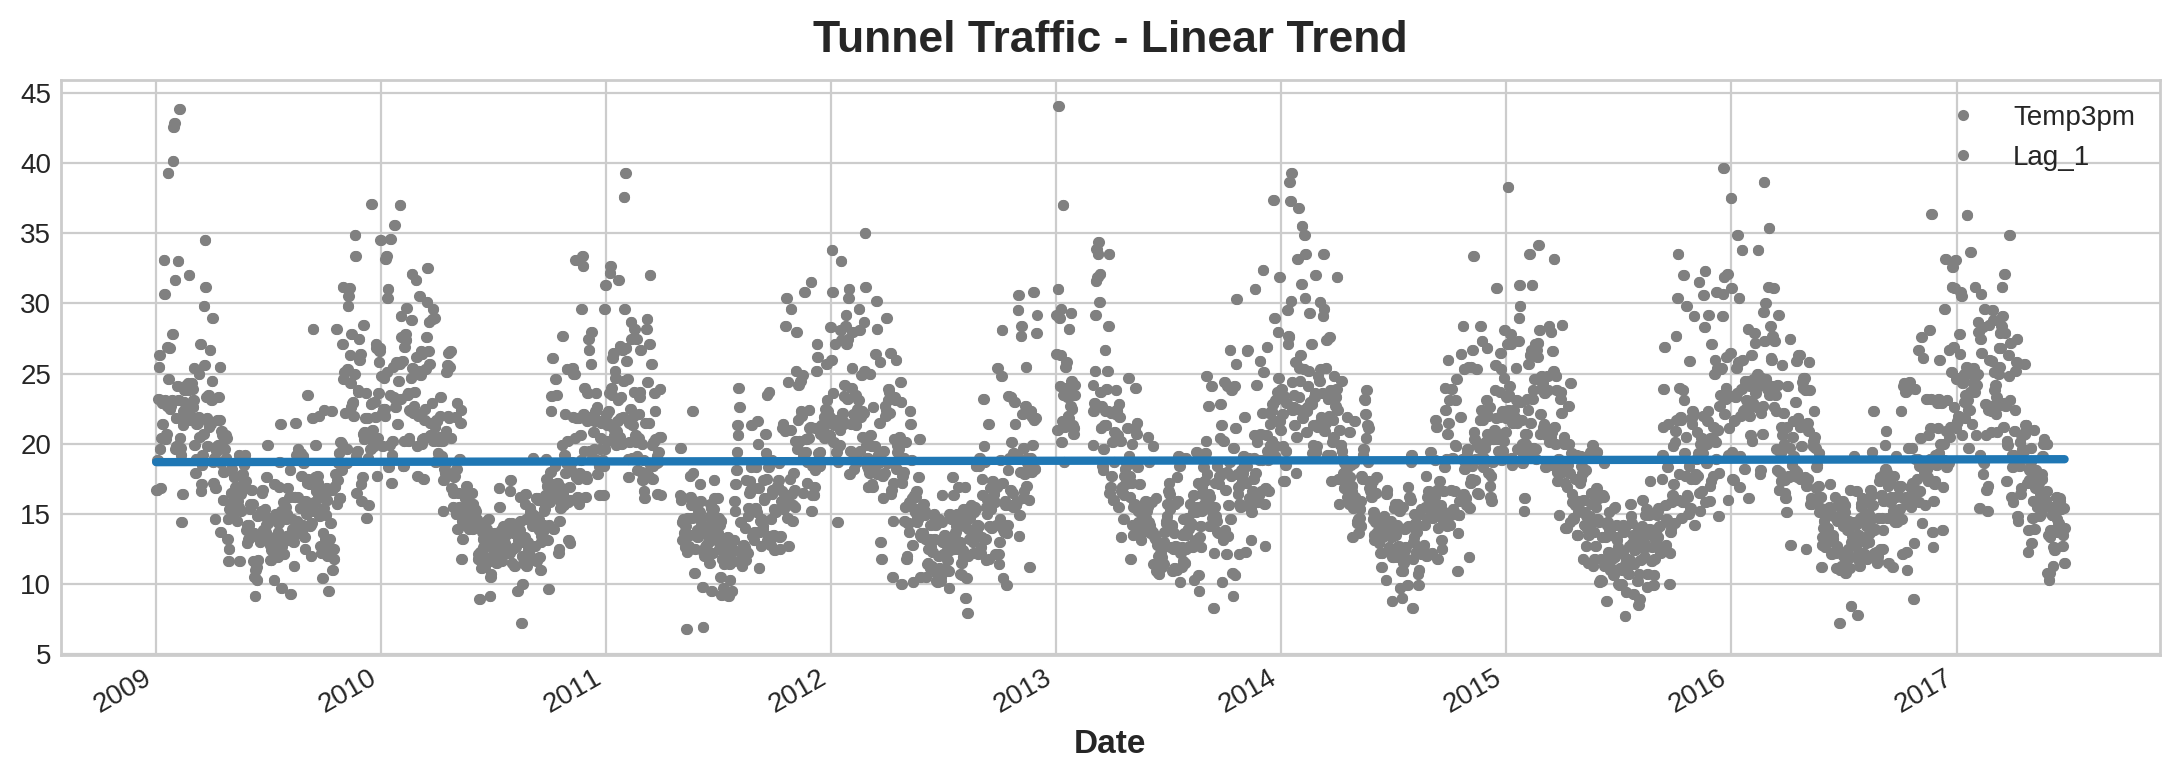

In [ ]:

ax = data.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [ ]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)

y_fore.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


3009    18.886719
3010    18.886788
3011    18.886857
3012    18.886926
3013    18.886996
dtype: float64

In [ ]:
data.tail()

,Temp3pm,Lag_1
Date,,
2017-06-21,12.7,15.4
2017-06-22,13.5,12.7
2017-06-23,15.4,13.5
2017-06-24,11.5,15.4
2017-06-25,14.0,11.5


# Arrumar

In [ ]:
ax = data["2017-06":].plot(title="Tunnel Traffic - Linear Trend Forecast")
ax = y_pred["2017-06":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()